# 1. Data Understanding



## **UF file structure**

## **The Meteorological Data Volume**

**Format:** MDV (unique to RAL and NCAR)

**Data Content:** Single time gridded data with support for multiple data fields in a single file. Includes 2- and 3-dimensional data with various projection types in (x,y) and vertical dimensions.

**Projection Types (x,y):**
- Lambert Conformal Conic
- Stereographic
- Latitude-Longitude grid (Simple Cylindrical)
- Polar coordinates

**Projection Types (vertical):**
- Height (km or ft)
- Pressure levels
- Flight levels for aviation
- Sigma levels for numerical models
- Elevation angles for radar data

**Field Types:** 4-byte floating point, 2- and 1-byte scaled integers, and 4-byte RGBA image pixels

**Extensible:** Supports user-attachable additional information.

**Other Features:**
- FORTRAN-compatible I/O structure
- Date/time stamping
- Byte swapping for cross-platform compatibility

**File Structure:**

MDV files follow a specific file structure. All MDV header information appears at the beginning of the file, followed by the field data and any optional chunk data. Header lengths are specified in bytes.

<div >
  <img src="https://www.notion.so/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F6f431e95-8f27-48e6-a11e-ca92c46ad5ef%2F231ab704-245b-494a-9325-41659264c7b6%2FUntitled.png?table=block&id=4092a02e-6f27-4d24-8fd9-f886130eec21&spaceId=6f431e95-8f27-48e6-a11e-ca92c46ad5ef&width=1930&userId=20429bc9-a9dc-4385-b2d6-32129efed062&cache=v2" align="left" width="600px" style="margin-right: 20px;"/>

  - <u>*Master Header:*</u> The master header contains file offsets to the field header array, v-level (vertical level) header array, and, optionally, the chunk header array.

  - <u>*Field Headers:*</u> Field headers contain file offsets to the field data, providing essential information about each data field.

  - <u>*V-Level Headers:*</u> V-level headers store details about the third dimension data, which could include Cartesian plane heights, radar elevation angles, and more.

  - <u>*Chunk Headers (Optional):*</u> Chunk headers contain file offsets to chunk data, if present.

</div>

<br clear="left"/>


**Endianness:** Big-endian

**Language Support:** Originally developed for C and C++, with support in FORTRAN, Java, and IDL.

**Naming Convention:** Based on time, with options for valid time and generate time/lead time.

- By Valid Time: This convention names files after the time of observation (valid time), simplifying data organization. The format is:

```
data_dir/yyyymmdd/hhmmss.mdv
```

- By Generate Time and Lead Time: Suited for forecast data, this naming convention includes the time a model was run (generate time) and the forecast lead time. It enables distinction between forecasts with the same valid time. The format is 

```
data_dir/yyyymmdd/g_hhmmss/f_llllllll.mdv
```

  **Advantages:**

  - By Valid Time: Ideal for observational data, easy identification based on observation time.

  - By Generate Time and Lead Time: Useful for forecast data, enables differentiation of forecasts with the same valid time, and indicates temporal aspects of the data. Careful naming aids data organization and retrieval.

**Field Data Location and Size:** Field data offset and volume size specified in the field header. Data is stored in X-Y-Z order, with a specific unpacking process. GZIP compression is recommended for file size or bandwidth considerations.



## 2. Issues and Concerns

**Relevance to Our Topic:** “How to integrate data from multiple sources”. When doing data integration, we should not only care about how to do schema and semantic mapping, but also take in mind the task of managing our system as a whole. How to scale up our topics of data.

**Data Quality:** How to know our data are quality. If not, how to determine our data have missing values, outliers, or inconsistencies.

**Data Preprocessing Needs:** Highlight any necessary data cleaning, transformation, or standardization steps.

**Data Limitations:** Should we consider optimizing data storage, or optimizing lookup convention/speed.

<!-- ## 3. Additional Data Requirements

**Data Variables:** Specify if there are specific variables or attributes required for our analysis that are not present in the dataset.

**Data Sources:** Identify potential additional data sources that may complement or enhance our analysis.

**Data Access:** Check if there are any restrictions on data access or licensing issues.

## 4. Conclusion

Summarize the key takeaways from your analysis of the dataset, including any action items for the team.

By following this template, each team can provide a concise and informative report on the datasets, ensuring a clear understanding and readiness for further analysis. Please make sure to replace the placeholders in square brackets with the actual dataset and project-specific information. -->


# Old research

In [2]:
import os
import pyart
import matplotlib.pyplot as plt

# Define the root directory where UF radar data files are located
# Define the root directory where UF radar data files are located
root_directory = './_uf'

# Define the output directory for PNG files
output_directory = './radar_png'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [12]:
import os
import pyart
import matplotlib.pyplot as plt

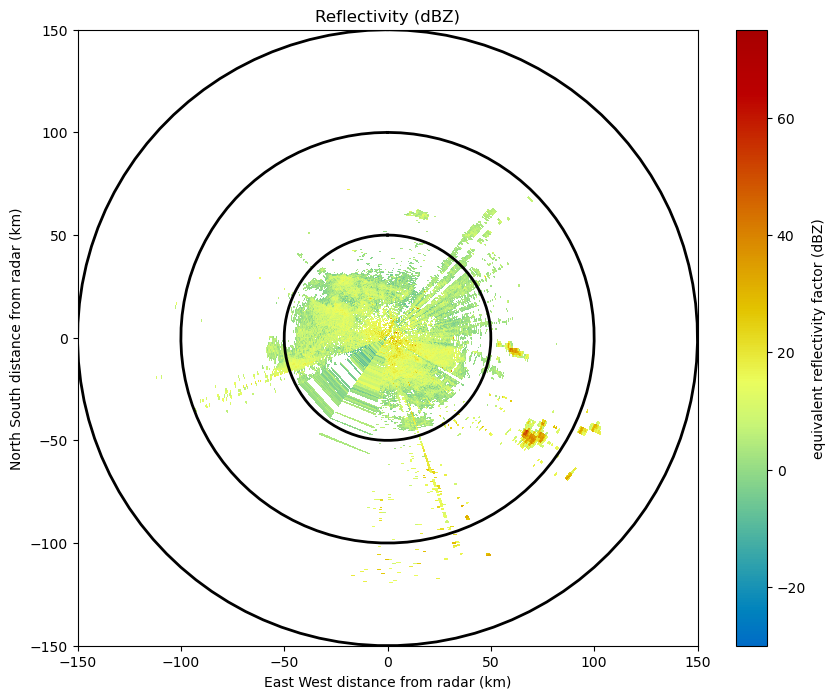

In [13]:
# Replace 'your_radar_data_file' with the path to your radar data file (in a supported format).
radar_data_file = './WeatherDataset/NHB190510231240.uf'

# Load the radar data from the file
radar = pyart.io.read(radar_data_file)

# Create a display object for the radar data
display = pyart.graph.RadarDisplay(radar)

# Plot reflectivity data
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111)
display.plot('reflectivity', 0, ax=ax, title='Reflectivity (dBZ)')
display.set_limits(xlim=(-150, 150), ylim=(-150, 150), ax=ax)

# Display range rings at 50-km intervals
display.plot_range_rings([50, 100, 150])

# Show the plot
plt.show()

In [25]:
def process_uf_file(file_path):
    try:
        # Load the radar data from the UF file
        radar = pyart.io.read(radar_data_file)

        # Create a display object for the radar data
        display = pyart.graph.RadarDisplay(radar)

        # Plot reflectivity data
        fig = plt.figure(figsize=[10, 8])
        ax = fig.add_subplot(111)
        display.plot('reflectivity', 0, ax=ax, title='Reflectivity (dBZ)')
        display.set_limits(xlim=(-150, 150), ylim=(-150, 150), ax=ax)

        # Display range rings at 50-km intervals
        display.plot_range_rings([50, 100, 150])

        # Export the plot as an image file to the output directory
        output_filename = os.path.join(output_directory, os.path.basename(file_path).replace('.uf', '.png'))
        plt.savefig(output_filename, dpi=100)
        plt.close()

        print(f'Processed: {file_path}')
    except Exception as e:
        print(f'Error processing {file_path}: {str(e)}')

In [ ]:
# Recursively traverse the directory and its subdirectories
for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith('.uf'):
            file_path = os.path.join(root, file)
            process_uf_file(file_path)

print(f'PNG files exported to: {output_directory}')

In [27]:
!rm -rf ./_uf/**/*.png

zsh:1: no matches found: ./_uf/**/*.png


In [6]:
import os
import pyart
import numpy as np

import os

# Start of research

In [5]:
!ls UF | head -6

NHB190510231240.RAW97JC
NHB190510231240.uf
NHB190510232007.RAW97JE
NHB190510232007.uf
NHB190510232239.RAW97JH
NHB190510232239.uf
ls: stdout: Broken pipe


In [7]:
# Load the radar file
weather_dataset = './WeatherDataset/'
radar_file_name = 'NHB190510231240.uf'
radar_file = os.path.join(weather_dataset, radar_file_name)

radar = pyart.io.read(radar_file)
# For a detailed print of the Py-ART radar object, use radar.info()
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1748,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (1748,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	total_power:
		data: <ndarray of type: float32 and shape: (1748, 1198)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Total power
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	reflectivity:
		data: <ndarray of type: float32 and shape: (1748, 1198)>
		units: dBZ


In [8]:
# Let's view the elevation parameter. Py-ART stores all fields as 2D masked arrays
# of dimensions (number of rays) x (number of gates). Therefore, as the elevation can change with
# each ray, the data in the elevation array is a 1D array of dimension (number of rays)
radar.elevation

{'units': 'degrees',
 'standard_name': 'beam_elevation_angle',
 'long_name': 'elevation_angle_from_horizontal_plane',
 'axis': 'radial_elevation_coordinate',
 'comment': 'Elevation of antenna relative to the horizontal plane',
 'data': array([0.51361084, 0.48339844, 0.4779052 , ..., 4.990539  , 4.987793  ,
        5.001526  ], dtype=float32)}

In [9]:
# If we just want the elevations of one sweep, we can use the get_slice() function
# of the Radar object to just get the elevations from one slice.
sweep_1 = radar.get_slice(1)
print(radar.elevation["data"][sweep_1])

[1.51062   1.4804076 1.4941405 1.5490721 1.5325928 1.543579  1.5545654
 1.5518188 1.5655516 1.5682982 1.5463256 1.5875243 1.6122437 1.5710448
 1.5298461 1.5682982 1.6204833 1.5902709 1.5518187 1.5051268 1.5270995
 1.5518188 1.5710448 1.5545654 1.5518188 1.557312  1.5628052 1.5710448
 1.5600585 1.5792847 1.5847777 1.5545654 1.5682982 1.5435791 1.5737915
 1.5902709 1.5847777 1.5490721 1.5463256 1.5380858 1.5133666 1.5353394
 1.5600585 1.516113  1.5023804 1.562805  1.5710448 1.5435791 1.5380858
 1.5490721 1.5628052 1.5490721 1.5353392 1.5518188 1.571045  1.5902709
 1.5353392 1.5216064 1.5765378 1.5573119 1.5133666 1.5298461 1.5408323
 1.5188596 1.5463256 1.5463256 1.51062   1.524353  1.5518187 1.5792845
 1.4913939 1.543579  1.5847777 1.5270995 1.5023803 1.4886473 1.524353
 1.5325927 1.5188596 1.496887  1.5353394 1.5216064 1.5216064 1.5133666
 1.5161133 1.5353392 1.5023803 1.5188597 1.5188596 1.5463256 1.5051267
 1.4474487 1.5051267 1.5298461 1.5161133 1.4913939 1.496887  1.4694213
 1.5023

In [10]:
# All of the radar fields are stored in a dictionary called radar.fields. This dictionary
# contains entries that correspond to the field names in the file.
radar.fields["reflectivity"]

{'units': 'dBZ',
 'standard_name': 'equivalent_reflectivity_factor',
 'long_name': 'Reflectivity',
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[--, --, --, ..., --, --, --],
         [--, 25.989999771118164, 26.670000076293945, ..., --, --, --],
         [--, 31.899999618530273, 30.139999389648438, ..., --, --, --],
         ...,
         [16.34000015258789, 23.09000015258789, --, ..., --, --, --],
         [--, --, 26.579999923706055, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[ True,  True,  True, ...,  True,  True,  True],
         [ True, False, False, ...,  True,  True,  True],
         [ True, False, False, ...,  True,  True,  True],
         ...,
         [False, False,  True, ...,  True,  True,  True],
         [ True,  True, False, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32),
 '_FillValue': -9999.0}

In [14]:
import pyart
import os

# Define the base directory
base_dir = './WeatherDataset/'

# Define the relative path to the radar file within the base directory
relative_path = 'NHB190510231240.uf'

# Create the full radar file path
radar_file = os.path.join(base_dir, relative_path)

# Load the radar data
radar = pyart.io.read(radar_file)

# Define the output file paths
output_uf_file = os.path.join(base_dir, 'output.uf')
output_nc_file = os.path.join(base_dir, 'output.nc')

# Output the radar data as UF format
pyart.io.write_uf(output_uf_file, radar)

# Output the radar data as CF Radial (NetCDF) format
pyart.io.write_cfradial(output_nc_file, radar)

print(f'Radar data exported to UF format: {output_uf_file}')
print(f'Radar data exported to CF Radial format: {output_nc_file}')


Radar data exported to UF format: ./WeatherDataset/output.uf
Radar data exported to CF Radial format: ./WeatherDataset/output.nc


/Users/kiettran/miniforge3/envs/pyart_env/lib/python3.11/site-packages/pyart/io/cfradial.py:651: UserWarning: Unknown instrument parameter: prf_flag, not written to file.
  warnings.warn(message)
